In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("breast-cancer.csv")
df = shuffle(df)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
175,872113,0,8.671,14.45,54.42,227.2,0.09138,0.04276,0.00000,0.00000,...,9.262,17.04,58.36,259.2,0.11620,0.07057,0.0000,0.00000,0.2592,0.07848
69,859487,0,12.780,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,...,13.460,19.76,85.67,554.9,0.12960,0.07061,0.1039,0.05882,0.2383,0.06410
397,90401602,0,12.800,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,...,13.740,21.06,90.72,591.0,0.09534,0.18120,0.1901,0.08296,0.1988,0.07053
138,868826,1,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,...,18.550,21.43,121.40,971.4,0.14110,0.21640,0.3355,0.16670,0.3414,0.07147
461,911296202,1,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,...,36.040,31.37,251.20,4254.0,0.13570,0.42560,0.6833,0.26250,0.2641,0.07427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,88466802,0,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.1125,0.06136,0.3409,0.08147
19,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.2390,0.12880,0.2977,0.07259
156,8711202,1,17.680,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,...,20.470,25.11,132.90,1302.0,0.14180,0.34980,0.3583,0.15150,0.2463,0.07738
479,911916,1,16.250,19.51,109.80,815.8,0.10260,0.18930,0.22360,0.09194,...,17.390,23.05,122.10,939.7,0.13770,0.44620,0.5897,0.17750,0.3318,0.09136


In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 175 to 56
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             

In [5]:
df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,30371831.43,1.250206e+08,8670.00,869218.00,906024.00,8813129.00,9.113205e+08
diagnosis,569.0,0.37,4.800000e-01,0.00,0.00,0.00,1.00,1.000000e+00
radius_mean,569.0,14.13,3.520000e+00,6.98,11.70,13.37,15.78,2.811000e+01
texture_mean,569.0,19.29,4.300000e+00,9.71,16.17,18.84,21.80,3.928000e+01
perimeter_mean,569.0,91.97,2.430000e+01,43.79,75.17,86.24,104.10,1.885000e+02
area_mean,569.0,654.89,3.519100e+02,143.50,420.30,551.10,782.70,2.501000e+03
smoothness_mean,569.0,0.10,1.000000e-02,0.05,0.09,0.10,0.11,1.600000e-01
compactness_mean,569.0,0.10,5.000000e-02,0.02,0.06,0.09,0.13,3.500000e-01
concavity_mean,569.0,0.09,8.000000e-02,0.00,0.03,0.06,0.13,4.300000e-01
concave_points_mean,569.0,0.05,4.000000e-02,0.00,0.02,0.03,0.07,2.000000e-01


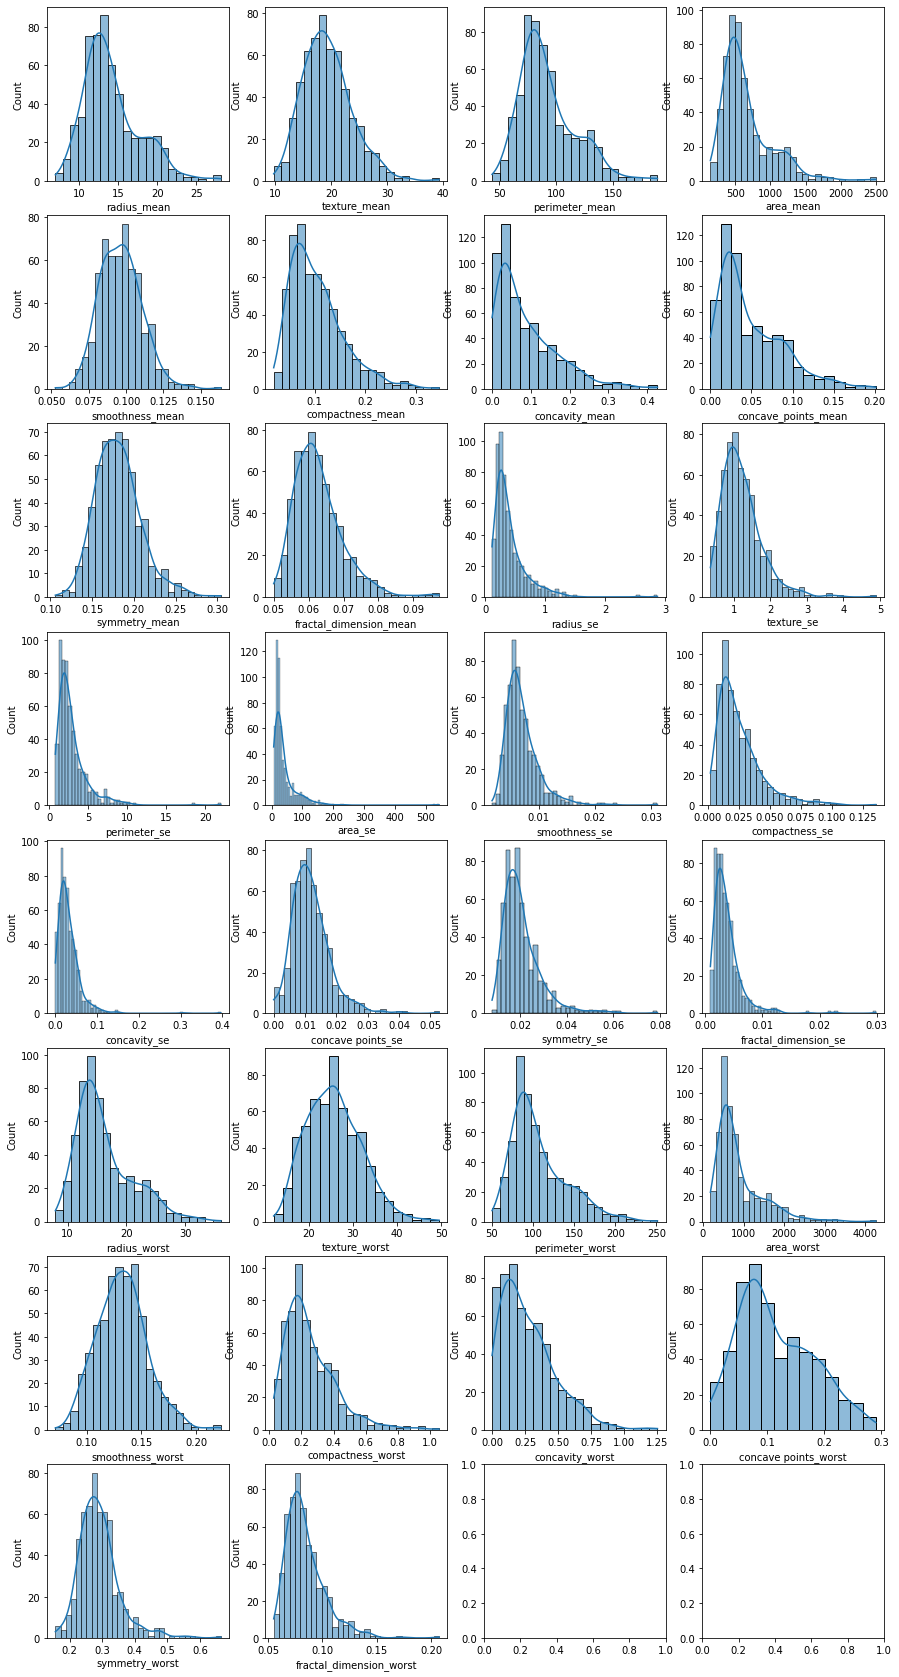

In [6]:
# select the columns to be plotted
cols = df.iloc[:,2:]

# create the figure and axes
fig, axes = plt.subplots(8, 4)
fig.set_size_inches(15, 30)  # ( x , y )
axes = axes.ravel()  # flattening the array makes indexing easier
for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, ax = ax)

plt.show()

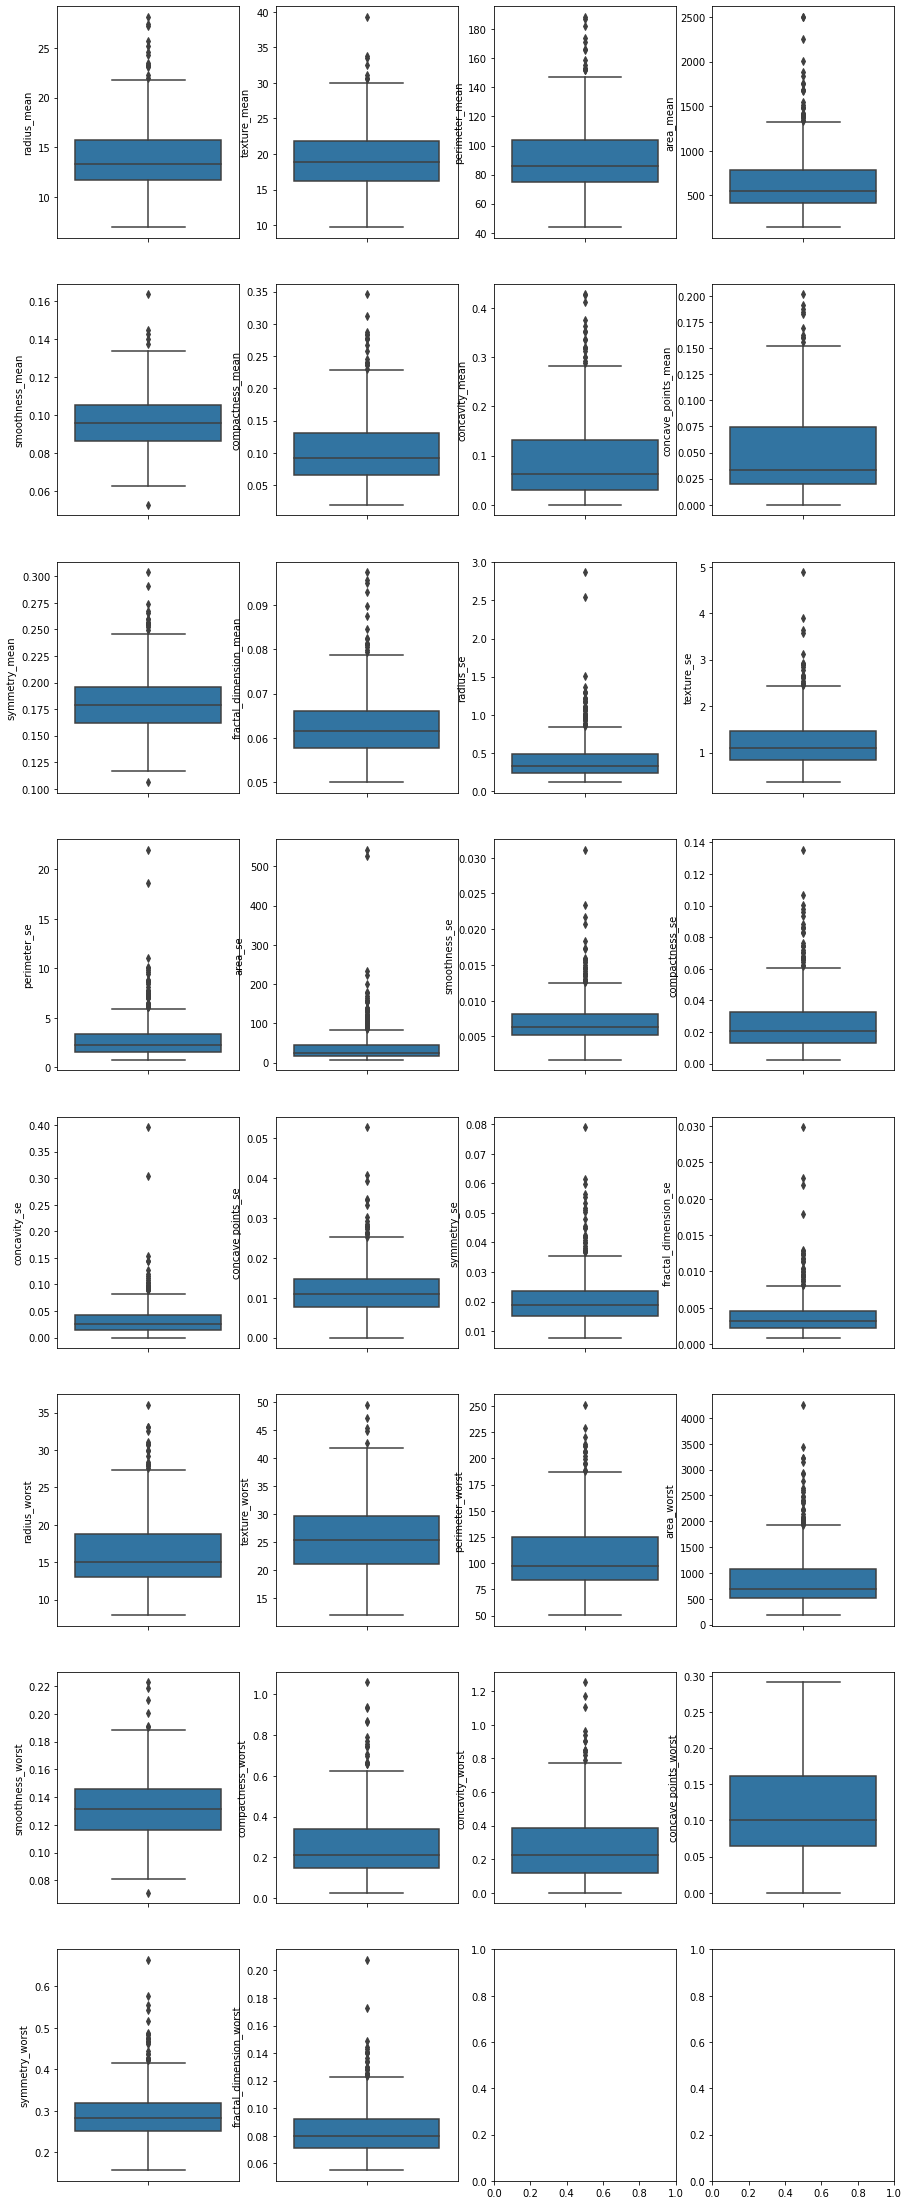

In [7]:
# select the columns to be plotted
cols = df.iloc[:,2:]

# create the figure and axes
fig, axes = plt.subplots(8, 4)
axes = axes.ravel()  # flattening the array makes indexing easier
fig.set_size_inches(15, 40)  # ( x , y )
for col, ax in zip(cols, axes):
    sns.boxplot(ax =ax,y=df[col])

plt.show()

In [8]:
# Calculate IQR
q75, q25 = np.percentile(df['area_worst'], [75 ,25])
IQR = q75 - q25

# Calculate lower and upper bounds
lower_bound = q25 - (IQR * 1.5)
upper_bound = q75 + (IQR * 1.5)

# Select rows that are outside the bounds
df_outliers = df.query('area_worst < @lower_bound or area_worst > @upper_bound')
df_outliers # 35 outliers

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
461,911296202,1,27.42,26.27,186.9,2501.0,0.10840,0.19880,0.3635,0.16890,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
521,91762702,1,24.63,21.60,165.5,1841.0,0.10300,0.21060,0.2310,0.14710,...,29.92,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671
180,873592,1,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
164,8712289,1,23.27,22.04,152.1,1686.0,0.08439,0.11450,0.1324,0.09702,...,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
236,88299702,1,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
212,8810703,1,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
300,892438,1,19.53,18.90,129.5,1217.0,0.11500,0.16420,0.2197,0.10620,...,25.93,26.24,171.1,2053.0,0.1495,0.4116,0.6121,0.1980,0.2968,0.09929
82,8611555,1,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
564,926424,1,21.56,22.39,142.0,1479.0,0.11100,0.11590,0.2439,0.13890,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
449,911157302,1,21.10,20.52,138.1,1384.0,0.09684,0.11750,0.1572,0.11550,...,25.68,32.07,168.2,2022.0,0.1368,0.3101,0.4399,0.2280,0.2268,0.07425


In [9]:
# Remove Outliers, Copy orig df before 
df_orig = df.copy()
num = df.iloc[:,1:]
for i in num:
    q75, q25 = np.percentile(df.loc[:,i],[75,25])
    IQR = q75 - q25
    max = q75 + 1.5*IQR
    min = q25 - 1.5*IQR
    df.loc[df[i] > max, i] = df[i].mean()
    df.loc[df[i] < min, i] = df[i].mean()

In [10]:
# Select rows that are outside the bounds
df_outliers = df.query('area_worst < @lower_bound or area_worst > @upper_bound')
df_outliers # outliers removed


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [11]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
175,872113,0.0,8.671000,14.45,54.420000,227.200000,0.09138,0.04276,0.000000,0.000000,...,9.26200,17.04,58.360000,259.200000,0.11620,0.07057,0.0000,0.00000,0.2592,0.07848
69,859487,0.0,12.780000,16.49,81.370000,502.500000,0.09831,0.05234,0.036530,0.028640,...,13.46000,19.76,85.670000,554.900000,0.12960,0.07061,0.1039,0.05882,0.2383,0.06410
397,90401602,0.0,12.800000,17.46,83.050000,508.300000,0.08044,0.08895,0.073900,0.040830,...,13.74000,21.06,90.720000,591.000000,0.09534,0.18120,0.1901,0.08296,0.1988,0.07053
138,868826,1.0,14.950000,17.57,96.850000,678.100000,0.11670,0.13050,0.153900,0.086240,...,18.55000,21.43,121.400000,971.400000,0.14110,0.21640,0.3355,0.16670,0.3414,0.07147
461,911296202,1.0,14.127292,26.27,91.969033,654.889104,0.10840,0.19880,0.088799,0.048919,...,16.26919,31.37,107.261213,880.583128,0.13570,0.42560,0.6833,0.26250,0.2641,0.07427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,88466802,0.0,10.650000,25.22,68.010000,347.000000,0.09657,0.07234,0.023790,0.016150,...,12.25000,35.19,77.980000,455.700000,0.14990,0.13980,0.1125,0.06136,0.3409,0.08147
19,8510426,0.0,13.540000,14.36,87.460000,566.300000,0.09779,0.08129,0.066640,0.047810,...,15.11000,19.26,99.700000,711.200000,0.14400,0.17730,0.2390,0.12880,0.2977,0.07259
156,8711202,1.0,17.680000,20.74,117.400000,963.700000,0.11150,0.16650,0.185500,0.105400,...,20.47000,25.11,132.900000,1302.000000,0.14180,0.34980,0.3583,0.15150,0.2463,0.07738
479,911916,1.0,16.250000,19.51,109.800000,815.800000,0.10260,0.18930,0.223600,0.091940,...,17.39000,23.05,122.100000,939.700000,0.13770,0.44620,0.5897,0.17750,0.3318,0.09136


In [12]:
cor = df.corr().round(2)
cor.sort_values(['diagnosis'],ascending=False,inplace=True)
cor.diagnosis

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.79
radius_worst               0.78
concave_points_mean        0.78
area_worst                 0.76
perimeter_mean             0.74
concavity_mean             0.74
area_mean                  0.72
radius_mean                0.72
area_se                    0.68
concavity_worst            0.68
radius_se                  0.58
compactness_worst          0.58
perimeter_se               0.58
compactness_mean           0.57
concave points_se          0.46
texture_worst              0.44
concavity_se               0.44
smoothness_worst           0.42
texture_mean               0.41
smoothness_mean            0.37
compactness_se             0.36
symmetry_worst             0.35
symmetry_mean              0.33
fractal_dimension_worst    0.29
fractal_dimension_se       0.19
id                         0.04
texture_se                 0.01
fractal_dimension_mean    -0.00
smoothness_se             -0.02
symmetry

In [13]:
cor2 = df_orig.corr().round(2)
cor2.sort_values(['diagnosis'],ascending=False,inplace=True)
cor2.diagnosis

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.78
concave_points_mean        0.78
radius_worst               0.78
perimeter_mean             0.74
radius_mean                0.73
area_worst                 0.73
area_mean                  0.71
concavity_mean             0.70
concavity_worst            0.66
compactness_mean           0.60
compactness_worst          0.59
radius_se                  0.57
perimeter_se               0.56
area_se                    0.55
texture_worst              0.46
smoothness_worst           0.42
symmetry_worst             0.42
texture_mean               0.42
concave points_se          0.41
smoothness_mean            0.36
symmetry_mean              0.33
fractal_dimension_worst    0.32
compactness_se             0.29
concavity_se               0.25
fractal_dimension_se       0.08
id                         0.04
symmetry_se               -0.01
texture_se                -0.01
fractal_dimension_mean    -0.01
smoothne

## Modeling

In [14]:
# Test Split



# X = df.loc[:,model_features]
# y = df.loc[:,'diagnosis']

# X = df.iloc[:,4:9].values
# y = df.loc[:,'diagnosis'].values

In [17]:
if isinstance(X_train, pd.DataFrame):
    print('DType:\nX_train:{}, y_train:{}\nShape:\nX_train:{}, y_train:{}\nType:\nX_train:{}, y_train{}'
          .format(type(X_train),type(y_train),X_train.shape,y_train.shape,type(X_train),type(y_train)))
else:
    print(print('DType:\nX_train:{}, y_train:{}\nShape:\nX_train:{}, y_train:{}\nType:\nX_train:{}, y_train{}'
                .format(X_train.dtype,y_train.dtype,X_train.shape,y_train.shape,type(X_train),type(y_train))))
       

DType:
X_train:float64, y_train:float64
Shape:
X_train:(426, 5), y_train:(426,)
Type:
X_train:<class 'numpy.ndarray'>, y_train<class 'numpy.ndarray'>
None


In [19]:
model_features =   df.loc[:,['perimeter_worst','radius_worst','concave_points_mean',
                'area_worst','perimeter_mean','area_mean','radius_mean',
                'radius_mean','area_se','concavity_worst','radius_se', 'compactness_worst',
                'perimeter_se','compactness_mean' ]]

# model_features =   df.loc[:,['perimeter_worst','radius_worst','concave_points_mean',
#                     'area_worst','perimeter_mean','concavity_mean','area_mean',
#                     'radius_mean','area_se','concavity_worst','radius_se', 'compactness_worst',
#                     'perimeter_se','compactness_mean' ]]

# X = model_features.values
# X = df[['perimeter_worst','radius_worst','concave_points_mean','area_worst','perimeter_mean']].values
X = model_features.iloc[:,0:6].values
y = df['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X,y)



### Logistic Regression

In [20]:
# Model
lgreg = LogisticRegression()
lgreg.fit(X_train, y_train)
threshold = 0.5
y_pred = lgreg.predict(X_test)

AttributeError: 'str' object has no attribute 'decode'